In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
team = pd.read_csv("StudentsPerformance.csv")
team

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
team.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

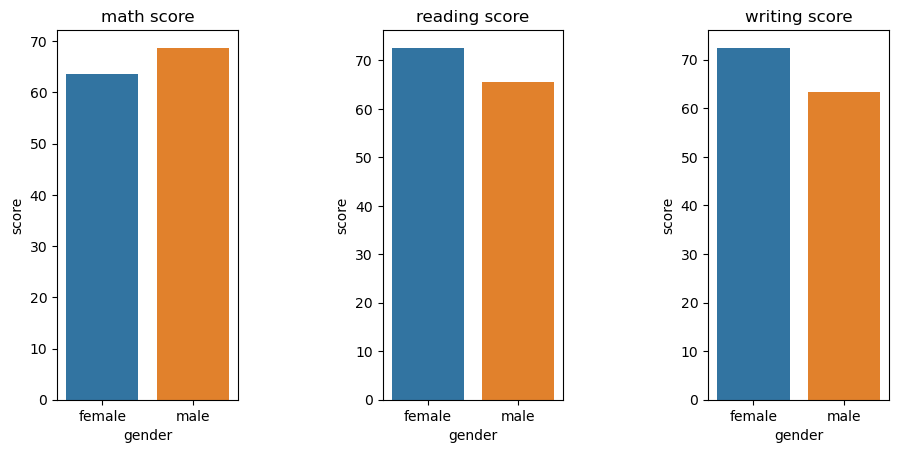

In [4]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = team.groupby("gender")[list(team.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(team.columns[-3:])[idx])
    
plt.show()

We can see that male has better performance on math field, but worse on reading and writing

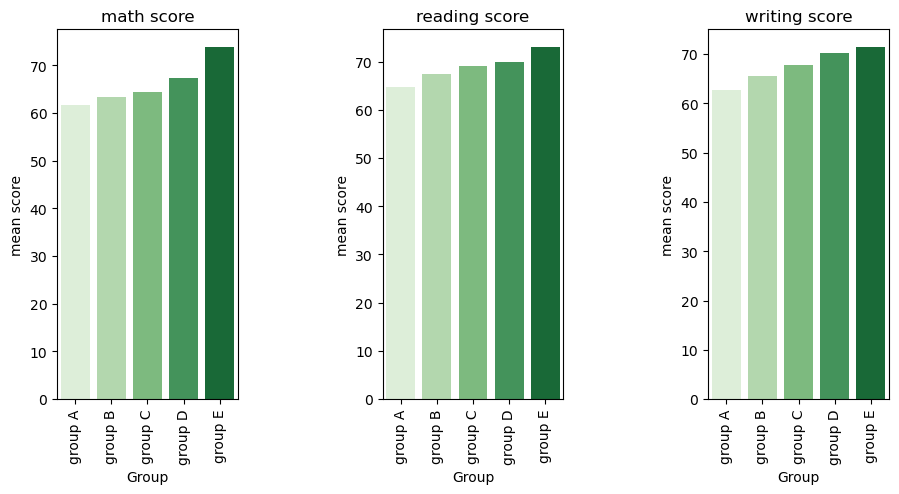

In [23]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for i in range(3):
    plt.subplot(1,3, i+1)
    ethn_df = team.groupby("race/ethnicity")[list(team.columns[-3:])[i]].mean()
    sns.barplot(x = ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(team.columns[-3:])[i])
plt.show()

Obviously, group E has best performance for all the fields, and group A is the worst.

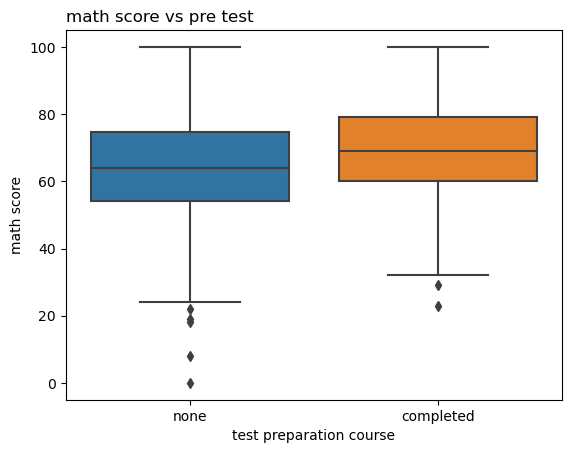

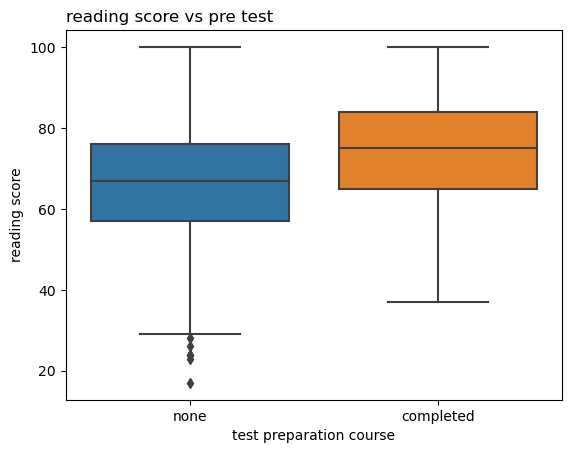

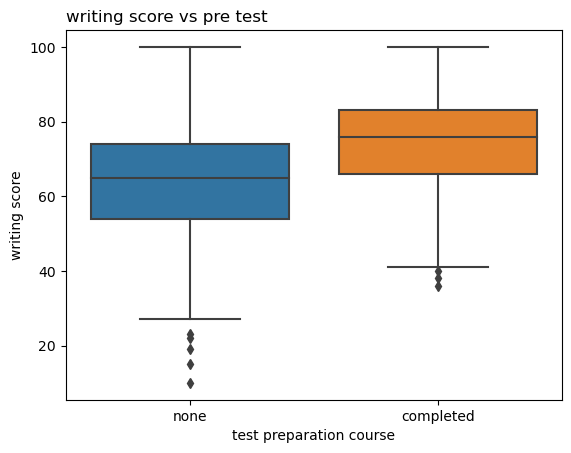

In [24]:
for item in team.columns[-3:]:
    sns.boxplot(x=team["test preparation course"], y=team[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

The score distribution got narrower if students complete the preparation before test, and also we can see that the average of the score is better.

In [25]:
team.boxplot(column="reading score")

<AxesSubplot:>

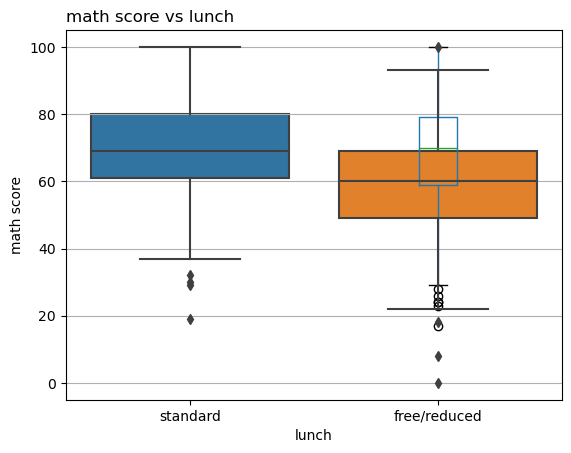

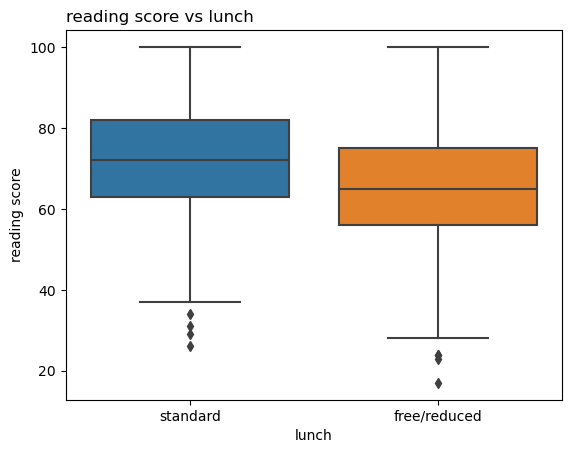

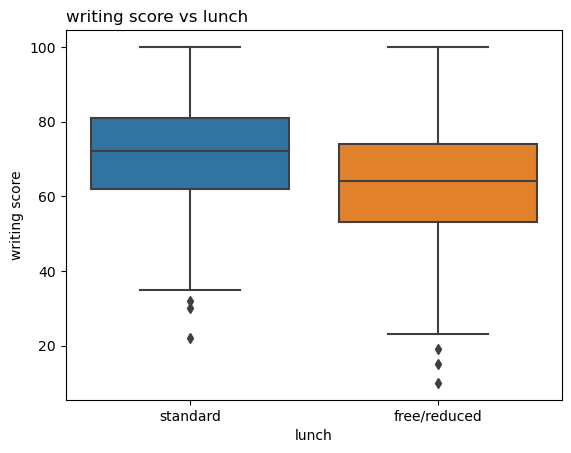

In [26]:
for item in team.columns[-3:]:
    sns.boxplot(x=team["lunch"], y=team[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

In [27]:
team['parental level of education'] = team['parental level of education'].replace({'high school':0, 'some high school':1,'some college':2,"bachelor's degree":3,"master's degree":4,"associate's degree":5})
team

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,3,standard,none,72,72,74
1,female,group C,2,standard,completed,69,90,88
2,female,group B,4,standard,none,90,95,93
3,male,group A,5,free/reduced,none,47,57,44
4,male,group C,2,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,4,standard,completed,88,99,95
996,male,group C,0,free/reduced,none,62,55,55
997,female,group C,0,free/reduced,completed,59,71,65
998,female,group D,2,standard,completed,68,78,77


In [28]:
team['lunch'] = team['lunch'].replace({'standard':0, 'free/reduced':1})
team['test preparation course'] = team['test preparation course'].replace({'none':0, 'completed':1})
team

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,3,0,0,72,72,74
1,female,group C,2,0,1,69,90,88
2,female,group B,4,0,0,90,95,93
3,male,group A,5,1,0,47,57,44
4,male,group C,2,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,4,0,1,88,99,95
996,male,group C,0,1,0,62,55,55
997,female,group C,0,1,1,59,71,65
998,female,group D,2,0,1,68,78,77


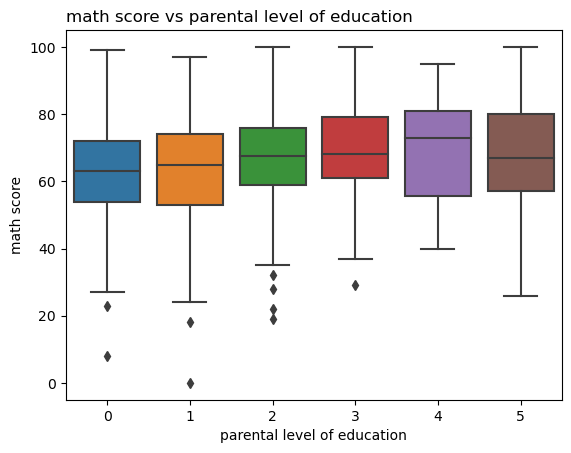

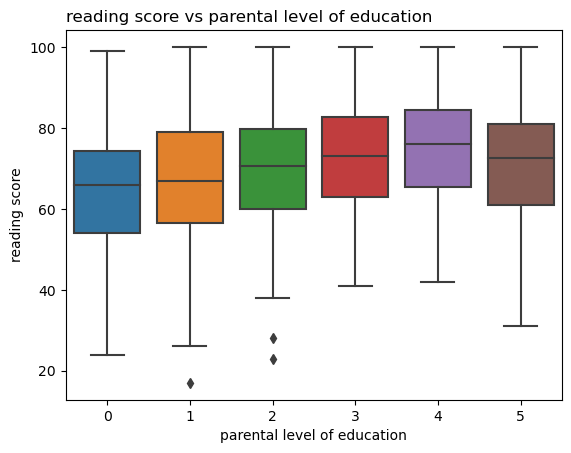

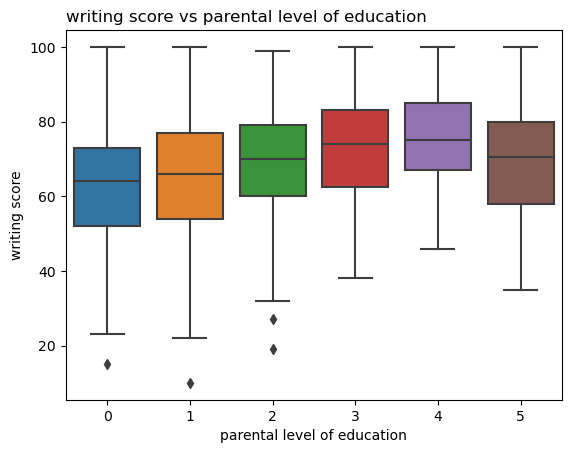

In [29]:
for item in team.columns[-3:]:
    sns.boxplot(x=team["parental level of education"], y=team[item])
    plt.title(item+" vs parental level of education", loc="left")
    plt.show()

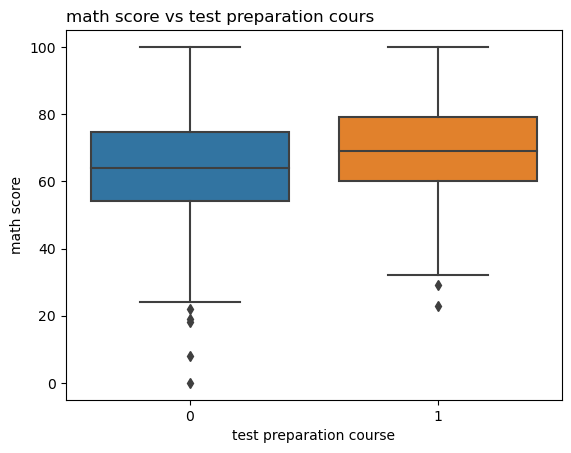

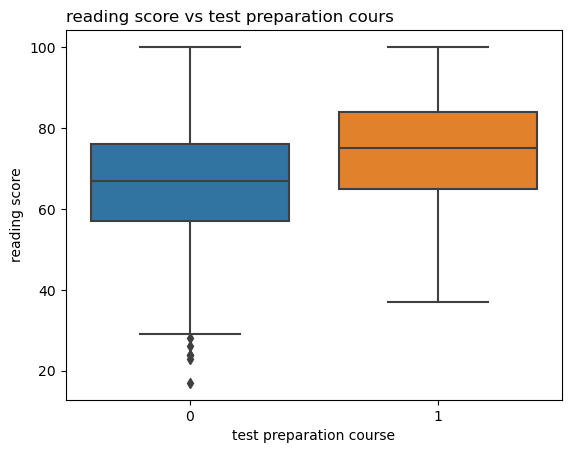

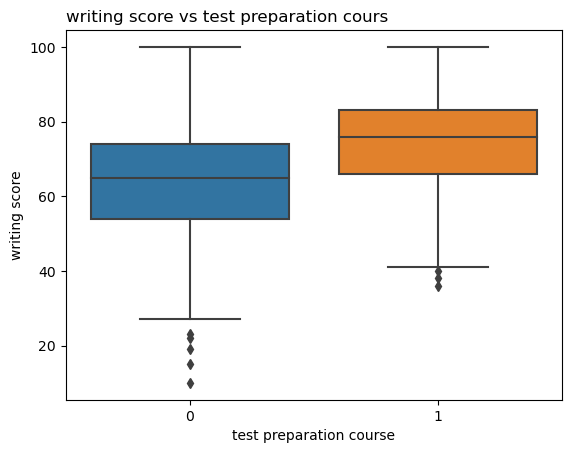

In [30]:
for item in team.columns[-3:]:
    sns.boxplot(x=team["test preparation course"], y=team[item])
    plt.title(item+" vs test preparation cours", loc="left")
    plt.show()

In [32]:
team_1=sns.lineplot(x='math score',y='parental level of education',data=team)
team_1

<AxesSubplot:xlabel='math score', ylabel='parental level of education'>